In [1]:
import pandas as pd
import os
import numpy as np
import pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
check_df = pd.read_csv('train.csv')

In [3]:
check_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Приведение категориальных признаков к числовым

In [4]:
def categorical_to_num(df):
    df_num = df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
    df_gender = pd.get_dummies(df['Sex']).drop(['female'], axis=1)
    uniq_embarked = df['Embarked'].unique()
    df_embarked = df['Embarked'].copy()
    df_embarked.replace(uniq_embarked, np.arange(uniq_embarked.shape[0]), inplace=True)
    df_num = pd.concat((df_num, df_embarked, df_gender), axis=1)
    return df_num

In [5]:
data_prepared = categorical_to_num(check_df)

In [6]:
data_prepared

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,0.0,1
1,1,1,38.0,1,0,71.2833,1.0,0
2,1,3,26.0,0,0,7.9250,0.0,0
3,1,1,35.0,1,0,53.1000,0.0,0
4,0,3,35.0,0,0,8.0500,0.0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0.0,1
887,1,1,19.0,0,0,30.0000,0.0,0
888,0,3,NaN,1,2,23.4500,0.0,0
889,1,1,26.0,0,0,30.0000,1.0,1


In [12]:
X = data_prepared.drop(['Survived'], axis=1)
y = data_prepared['Survived']

# Балансировка обучающей выборки

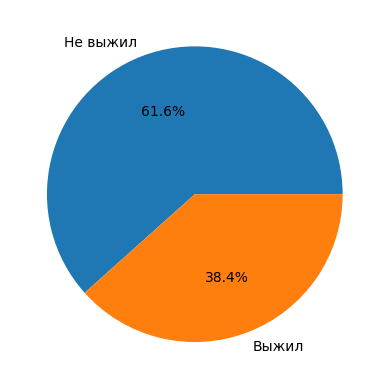

In [13]:
fig, ax = plt.subplots()
sizes = [len(y[y==0]), len(y[y==1])]
labels=['Не выжил', 'Выжил']
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

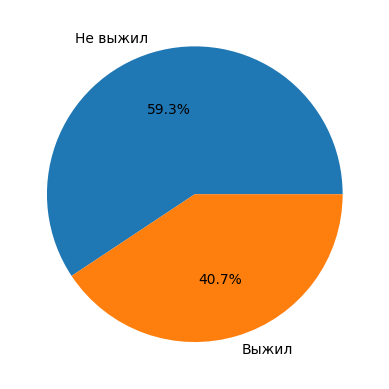

In [15]:
fig, ax = plt.subplots()
sizes = [len(y_test[y_test==0]), len(y_test[y_test==1])]
labels=['Не выжил', 'Выжил']
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

Как мы видим в наборе данных превалирует количество пассажиров, погибших на Титанике.

# Классификация с помощью RandomForest

In [16]:
clf = RandomForestClassifier(max_depth=8, random_state=1)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.8203389830508474

# Подготовка данных

In [17]:
numeric = ['Age', 'Fare']
scaler = StandardScaler()
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

In [20]:
clf = RandomForestClassifier(max_depth=8, random_state=1)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.8203389830508474

Значение метрики не улучшилось после нормализации.

# Анализ матрицы корреляции

In [21]:
X_scaled = X.copy()
X_scaled[numeric] = scaler.transform(X_scaled[numeric])

In [22]:
data_scaled = pd.concat((X_scaled, y), axis=1)

In [23]:
data_scaled

,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Survived
0,3,-0.490239,1,0,-0.479469,0.0,1,0
1,1,0.729278,1,0,0.765401,1.0,0,1
2,3,-0.185360,0,0,-0.466346,0.0,0,1
3,1,0.500619,1,0,0.411900,0.0,0,1
4,3,0.500619,0,0,-0.463916,0.0,1,0
...,...,...,...,...,...,...,...,...
886,2,-0.109140,0,0,-0.367683,0.0,1,0
887,1,-0.718899,0,0,-0.037186,0.0,0,1
888,3,-0.337800,1,2,-0.164525,0.0,0,0
889,1,-0.185360,0,0,-0.037186,1.0,1,1


In [24]:
corr_matrix = data_scaled.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Survived
Pclass,1.000000,0.356187,0.083081,0.018443,0.549500,0.028566,0.131900,0.338481
Age,0.356187,1.000000,0.232411,0.155118,0.107554,0.029844,0.073377,0.052872
SibSp,0.083081,0.232411,1.000000,0.414838,0.159651,0.063794,0.114631,0.035322
Parch,0.018443,0.155118,0.414838,1.000000,0.216225,0.082144,0.245489,0.081629
Fare,0.549500,0.107554,0.159651,0.216225,1.000000,0.071010,0.182333,0.257307
Embarked,0.028566,0.029844,0.063794,0.082144,0.071010,1.000000,0.128526,0.118026
male,0.131900,0.073377,0.114631,0.245489,0.182333,0.128526,1.000000,0.543351
Survived,0.338481,0.052872,0.035322,0.081629,0.257307,0.118026,0.543351,1.000000


# Вытащим признаки с коэффициентом корреляции (с Survived) выше 0.1

In [25]:
good_cols = list((corr_matrix[corr_matrix['Survived'] > 0.1]).drop('Survived').index.values)
bad_cols = list((corr_matrix[corr_matrix['Survived'] <= 0.1]).index.values)

In [26]:
good_cols

['Pclass', 'Fare', 'Embarked', 'male']

In [27]:
bad_cols

['Age', 'SibSp', 'Parch']

In [28]:
X_scaled_with_good_cols = X_scaled[good_cols]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_with_good_cols, y, test_size=0.33, random_state=42)

In [30]:
clf = RandomForestClassifier(max_depth=8, random_state=1)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.8

Значение метрики снова не улучшилось.

In [31]:
data_prepared.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,0.0,1
1,1,1,38.0,1,0,71.2833,1.0,0
2,1,3,26.0,0,0,7.9250,0.0,0
3,1,1,35.0,1,0,53.1000,0.0,0
4,0,3,35.0,0,0,8.0500,0.0,1


# Дополнительный анализ данных

In [32]:
ratio_of_male_survived = data_prepared.query('male == 1 and Survived == 1')
ratio_of_female_survived = data_prepared.query('male == 0 and Survived == 1')

Средний возраст тех, кто выжил:

In [33]:
check_df[check_df['Survived'] == 1]['Age'].mean()

28.343689655172415

СРедний возраст среди погибших:

In [34]:
check_df[check_df['Survived'] == 0]['Age'].mean()

30.62617924528302

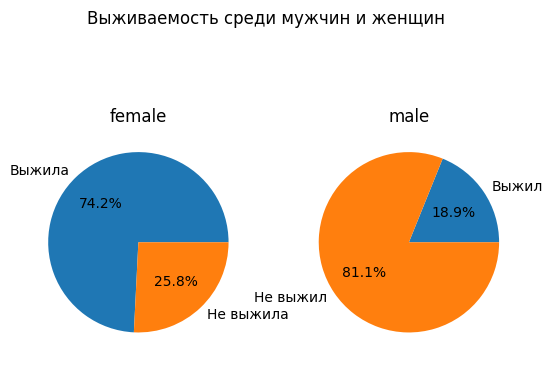

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sizes = [len(data_prepared[(data_prepared['male']==0)*(data_prepared['Survived']==1)]),
         len(data_prepared[(data_prepared['male']==0)*(data_prepared['Survived']==0)])]
labels = ['Выжила', 'Не выжила']
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%')
ax[0].set_title('female')

sizes = [len(data_prepared[(data_prepared['male']!=0)*(data_prepared['Survived']==1)]),
         len(data_prepared[(data_prepared['male']!=0)*(data_prepared['Survived'] ==0)])]
labels = ['Выжил', 'Не выжил']
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%')
ax[1].set_title('male')
fig.suptitle('Выживаемость среди мужчин и женщин')
plt.show()

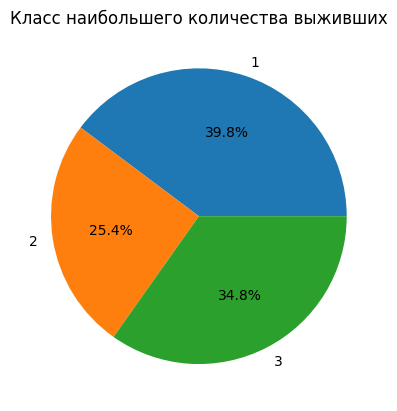

In [36]:
fig, ax = plt.subplots()

sizes = [len(data_prepared[(data_prepared['Pclass']==1)*(data_prepared['Survived']==1)]),
         len(data_prepared[(data_prepared['Pclass']==2)*(data_prepared['Survived']==1)]),
         len(data_prepared[(data_prepared['Pclass']==3)*(data_prepared['Survived']==1)])]
labels = ['1', '2', '3']
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title('Класс наибольшего количества выживших')
plt.show()

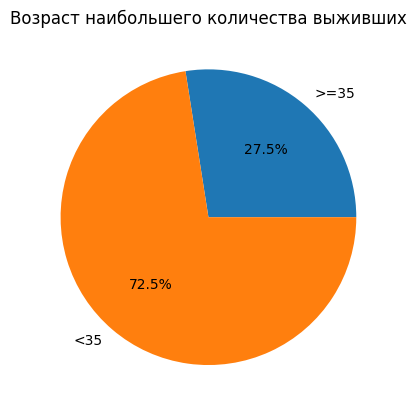

In [37]:
fig, ax = plt.subplots()

sizes = [len(data_prepared[(data_prepared['Age']>=35)*(data_prepared['Survived']==1)]),
         len(data_prepared[(data_prepared['Age']<35)*(data_prepared['Survived']==1)])]
labels = ['>=35', '<35']
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title('Возраст наибольшего количества выживших')
plt.show()

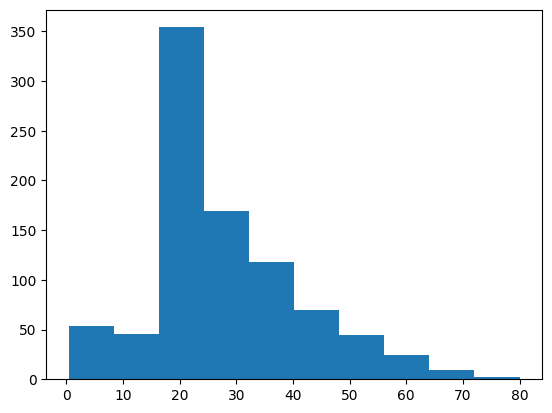

In [ ]:
plt.hist(data_prepared['Age'])
plt.show()